
# Project: Investigate a TMDb 10000 movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this project,I will analyze a movie data set to discover more information regarding its contents.This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.The end goal is to conduct investigative tests and document conclusions regarding the results

### Questions for Analysis
Some of the questions to be investigated include : <br>

1)What is the number of movies produced per year. <br>
2)What is the most popular movie. <br>
3)What properties are associatd with movies that have high revenues. <br>


In [75]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 'magic word' so that visualizations are plotted
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section,I am going to upload and display the data and perform operations to inspect and clean the movie data


### General Properties
Uploading and displaying a few rows of the data.

In [76]:
# Import the data set using pandas

df = pd.read_csv('tmdb_movies.csv')


In [77]:
#Display a few rows of the data set

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [78]:
#Display the number of rows and columns

df.shape

(10866, 21)

The data set has 10866 rows and 21 columns

In [79]:
#Display the details of the columns

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [80]:
#Display data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above display,there are several missing values in a number of rows of the data set

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

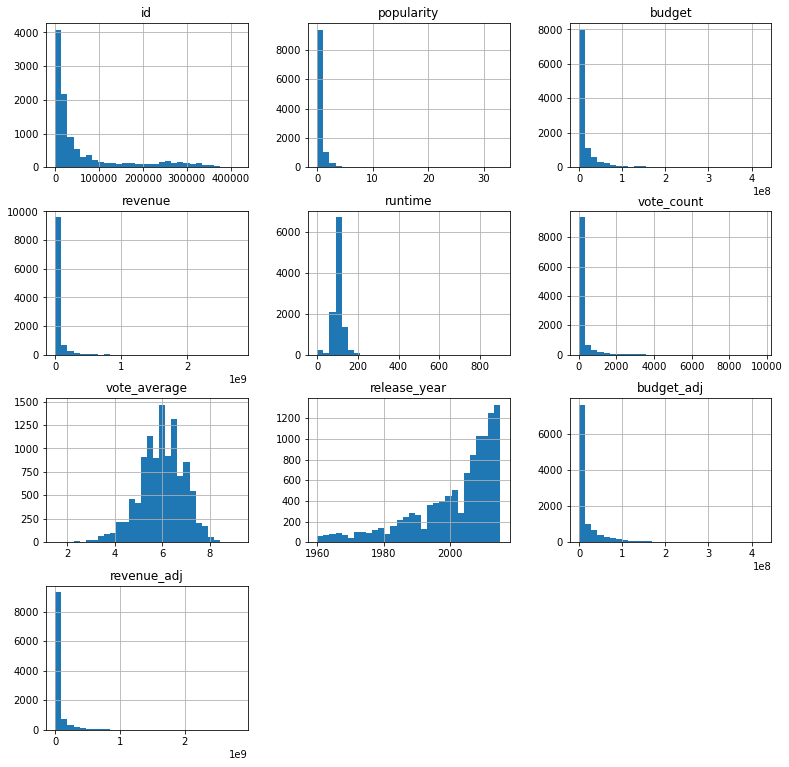

In [81]:
#Plot histograms to show various spreads of the data

df.hist(figsize = (13, 13), bins=30)

In [82]:
#To determine the number of zero-value popularity columns

df1 = df[df['popularity']==0]
df1.shape


(0, 21)

In [83]:
#Determine the number of zero-value revenue columns

df2 = df[df['revenue']==0]
df2.shape

(6016, 21)

In [84]:
#To determine the number of zero-value budget columns

df3 = df[df['budget']==0]
df3.shape

(5696, 21)

From the above probe,it is observed that there are : <br>

- 0 columns with zero-value popularity <br>
- 6016 columns with zero-value revenue <br>
- 5692 columns with zero-value budget <br>


### Data Cleaning
At ths stage, the data will be filtered to remove duplicate values, columns that are not required and rows with zero values in the budget and revenue columns
 
The columns that do not required are : id,cast, director, imdb_id, vote_count, vote_average, budget_adj, revenue_adj, tagline, keywords, overview, production_companies and homepage

In [85]:
#Drop unnecessary columns

df.drop(['id', 'imdb_id', 'vote_count', 'vote_average','cast','director', 'budget_adj', 'revenue_adj', 'tagline',  'keywords', 'overview', 'production_companies', 'homepage'], axis=1, inplace=True)


In [86]:
#Check the remaining columns

df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2015


In [87]:
#Check data types

df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

From the displayed data types,there is a need to convert the release date format to datetime format 


In [88]:
#Convert the data formats

df['release_date'] = pd.to_datetime(df['release_date'])


In [89]:
#Check the change in release_date format

df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [90]:
#Next up,check for duplicated data

df.duplicated().sum()

1

There is 1 row of duplicated data.This row should be dropped

In [91]:
#Drop the duplicates

df.drop_duplicates(inplace=True)

In [92]:
#Check that the duplicated data has been dropped

df.duplicated().sum()

0

In [93]:
#Check for null values

df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

There are null row values in the cast,director and genres columns. These rows need to be removed

In [94]:
#Remove the null values

df.dropna(inplace=True)

In [95]:
#Check that the null value rows have been removed

df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

The data has now been cleaned and is ready for further analysis

<a id='eda'></a>
## Exploratory Data Analysis

The data has now been cleaned and is now ready for further analysis. In this stage of the project,deep analyzation and visualization of the data is undertaken

### Research Question 1 : What is the number of movies per year

In [96]:
#Determine the number of movies per year

df['release_year'].value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     46
1966     46
1975     44
1964     42
1967     40
1970     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

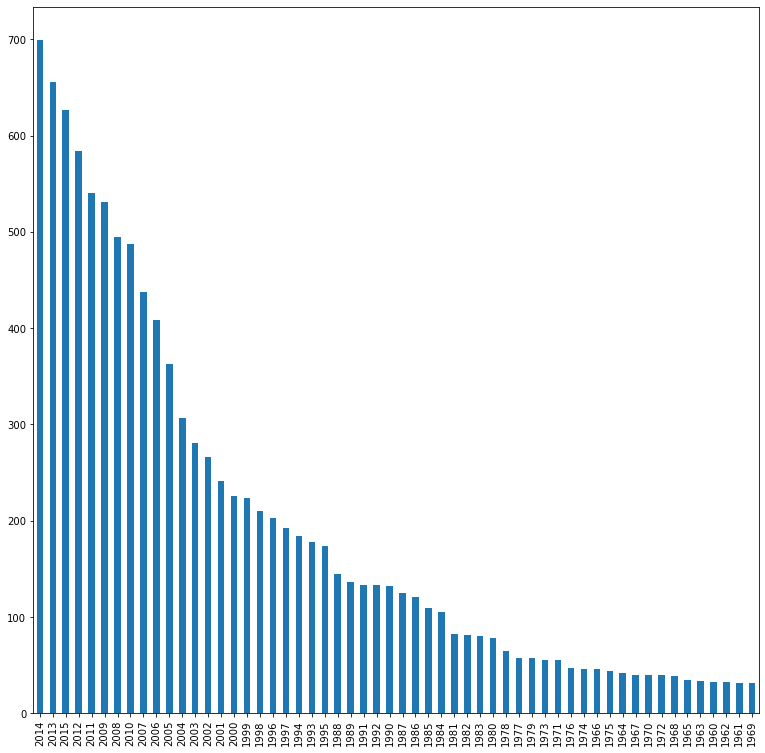

In [97]:
#Plot a bar graph to show the number of movies released per year

df['release_year'].value_counts().plot(kind='bar', figsize = (13, 13));

The bar chart above show the distribution of the number of movies per year. 2014 was the year with the most movies released (682) and the year 1930 had the least number of movies released(30) in the data set.

### Research Question 2 : What is the most popular movie ?

In [98]:
#Check for the most popular movie

df[df['popularity'].max() == df['popularity']]

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


The most popular movie by popularity is Jurassic world that was released in 2015

### Research Question 3 : What properties associated with movies that have high revenues

In [99]:
# Prepare a scatter plot to study the relationship between different variables and revenue.

def scatterFunc(df,x,y):
    df.plot(x=x,y=y, kind='scatter',figsize=(10, 10))
    plt.title('Relationship between {0} and {1}'.format(x,y))
    plt.xlabel(x)
    plt.ylabel(y);

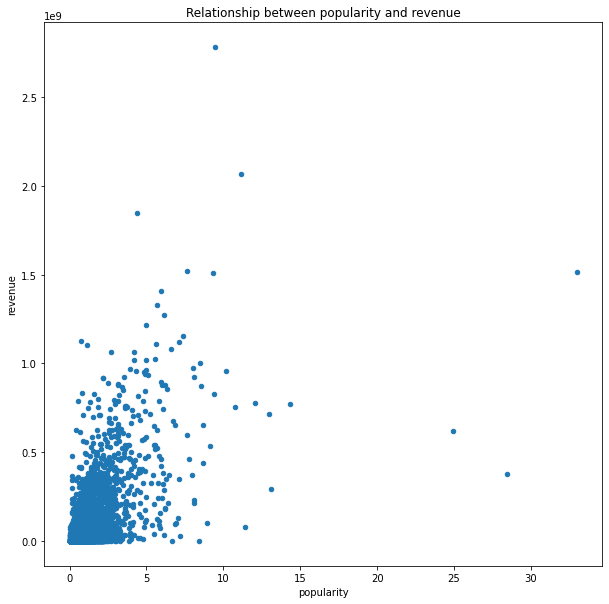

In [100]:
# Prepare a scatter plot to study the relationship between runtime and revenue

scatterFunc(df,'popularity','revenue')

From the plot above, there is no clear symbiotic relationship between popularity and the revenue generated by the movies.

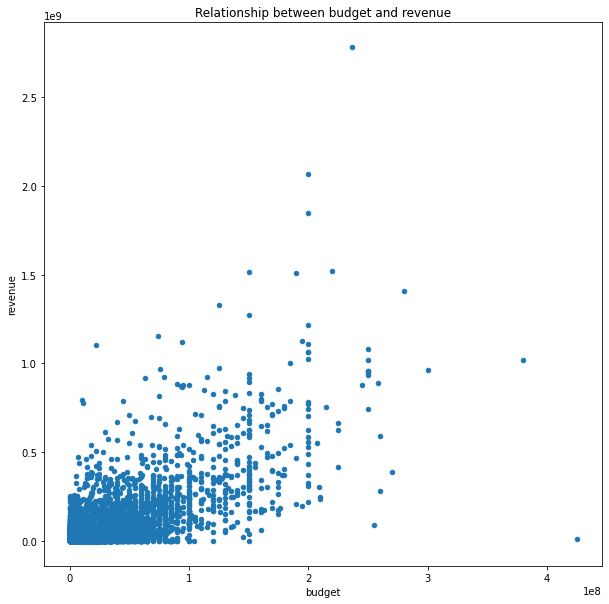

In [101]:
# Prepare a scatter plot to study the relationship between runtime and revenue.

scatterFunc(df,'budget','revenue')

From the above scatter plot,there is a positive relationship between the budget and the revenue generated by the movies in the data set. There is an upward trent in the scatter plots which leads us to believe that an increased budget results in an increse in the revenue that a movie generates.

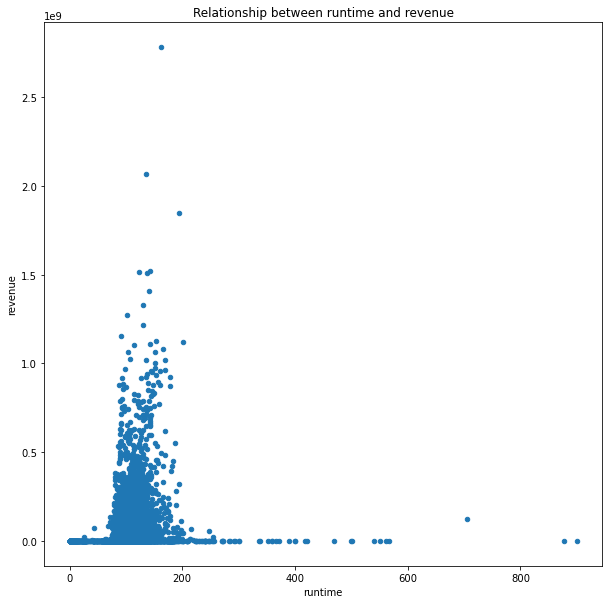

In [102]:
# Prepare a scatter plot to study the relationship between runtime and revenue.

scatterFunc(df,'runtime','revenue')

From the above plot diagram,it can be seen that there is a positive trend between the runtime and the revenue generated by the movies. Movies with a runstime of betweeen 100 minutes and 140 minutes generate more revenue than movies that are outside these time limits.

<a id='conclusions'></a>
## Conclusions

After conducting investigations, the most popular movie in the data set time frame has been identified, as well as the number of movies released per year.
The positive relationship between movie budget,runtime and the revenue generated has been observed

### Limitation
The removal of null value rows prevents us from completely accurately breaking this data down.


In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


4294967295